#Required installs and imports

In [ ]:
!pip3 install scikit-image matplotlib


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#Importing required libraries
import tensorflow as tf
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np
import pandas as pd
import os
import cv2
import seaborn as sns
from skimage.io import imread
from skimage.transform import resize
from skimage.feature import hog
#Drive Mount
from google.colab import drive
drive.mount('/content/drive')


#Parameters Setting

In [ ]:
BATCH_SIZE = 32
IMAGE_SIZE = 256
CHANNELS=3

# Data Loading

In [ ]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/drive/MyDrive/Datasets/original_dataset",
    seed=123,
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 2152 files belonging to 3 classes.


In [ ]:
class_names = dataset.class_names
class_names

['Early_blight', 'Healthy', 'Late_blight']

##Dataset creation

In [ ]:
data_dir = '/content/drive/MyDrive/Datasets/original_dataset'
path = os.path.join(data_dir)
df = []
for defects_id, sp in enumerate(class_names):
    for file in os.listdir(os.path.join(path, sp)):
        df.append(['{}/{}'.format(sp, file), defects_id, sp])
        
dataframe = pd.DataFrame(df, columns=['File', 'DiseaseID','Disease Type'])
dataframe


,File,DiseaseID,Disease Type
0,Early_blight/2767ef91-3383-4872-9804-e0bcd2bc4...,0,Early_blight
1,Early_blight/03b0d3c1-b5b0-48f4-98aa-f89046702...,0,Early_blight
2,Early_blight/07953ca1-8935-449f-b338-4357ed683...,0,Early_blight
3,Early_blight/08a892eb-19cc-45ea-babc-181b98f89...,0,Early_blight
4,Early_blight/38a72c90-ed53-4432-b625-01c1f962f...,0,Early_blight
...,...,...,...
2147,Late_blight/ea5fc080-37a7-4954-ba8c-a5d67b6a09...,2,Late_blight
2148,Late_blight/fb91b663-6a03-4165-8125-afc96e41ab...,2,Late_blight
2149,Late_blight/e25e57fb-41d5-4f46-92f7-ce841bd973...,2,Late_blight
2150,Late_blight/e10ce839-9da1-4f23-9b5e-c5483f6eab...,2,Late_blight


##Data distribution and image visualization

The distribution of entries in the dataset

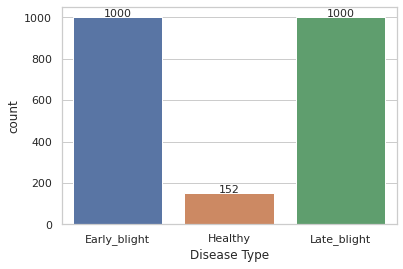

In [ ]:
sns.set_theme(style="whitegrid")
ax = sns.countplot(x ='Disease Type', data = dataframe)
for rect in ax.patches:
    ax.text (rect.get_x() + rect.get_width()  / 2,rect.get_height()+ 0.75,rect.get_height(),horizontalalignment='center', fontsize = 11)
plt.show()

As we can see , we have an imbalance between the 3 classes where Early blight and late blight each have a 1000 images but the healthy class only has 152

In [ ]:
for image_batch, labels_batch in dataset.take(1):
    print(image_batch.shape)
    print(labels_batch.numpy())

(32, 256, 256, 3)
[2 2 2 0 0 0 0 0 2 2 2 2 0 2 0 2 2 2 0 2 0 2 0 0 2 0 0 1 2 2 0 0]


We plot some examples of early blight diseased leaves

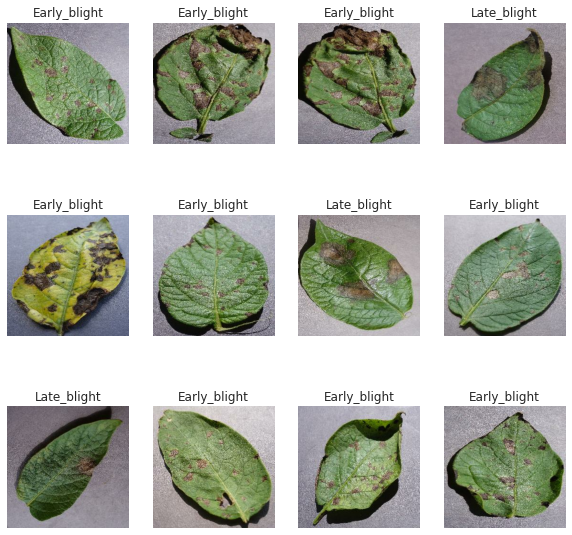

In [ ]:
plt.figure(figsize=(10, 10))
for image_batch, labels_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3, 4, i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[labels_batch[i]])
        plt.axis("off")

##Defective leaves detection

In [ ]:
def plot_defects(defect_types, rows, cols):
  """
  function that plots images depending on the type of defect and is given the number of images to generate
  defect_types -- Early_blight , Late_Blight or healthy
  rows -- number of rows to plot
  cols -- number of columns to plot
  """
    fig, ax = plt.subplots(rows, cols, figsize=(12, 12))
    defect_files = dataframe['File'][dataframe['Disease Type'] == defect_types].values
    n = 0
    for i in range(rows):
        for j in range(cols):
            image_path = os.path.join(data_dir, defect_files[n])
            ax[i, j].set_xticks([])
            ax[i, j].set_yticks([])
            ax[i, j].imshow(cv2.imread(image_path))
            n += 1


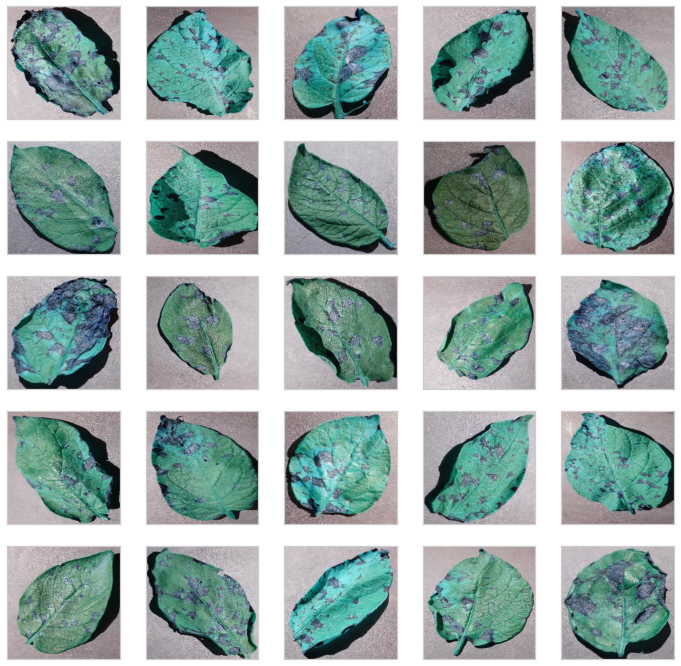

In [ ]:
plot_defects('Early_blight', 5, 5)

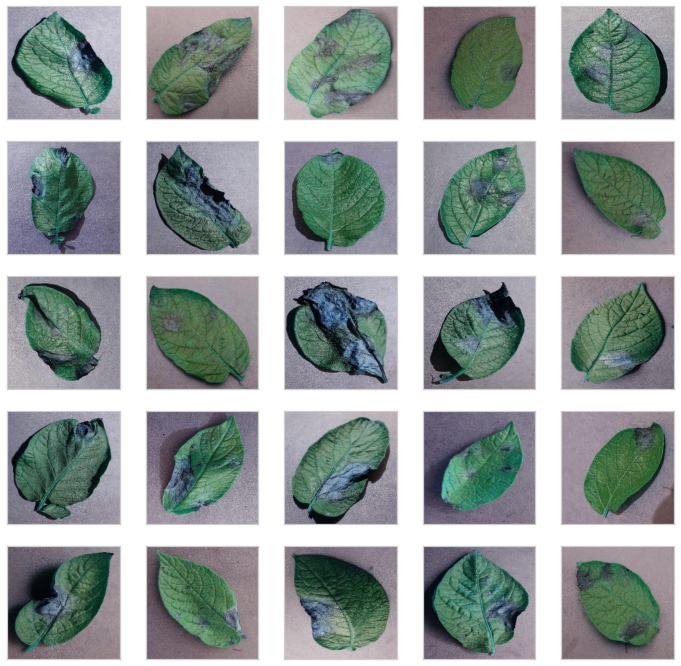

In [ ]:
plot_defects('Late_blight', 5, 5)

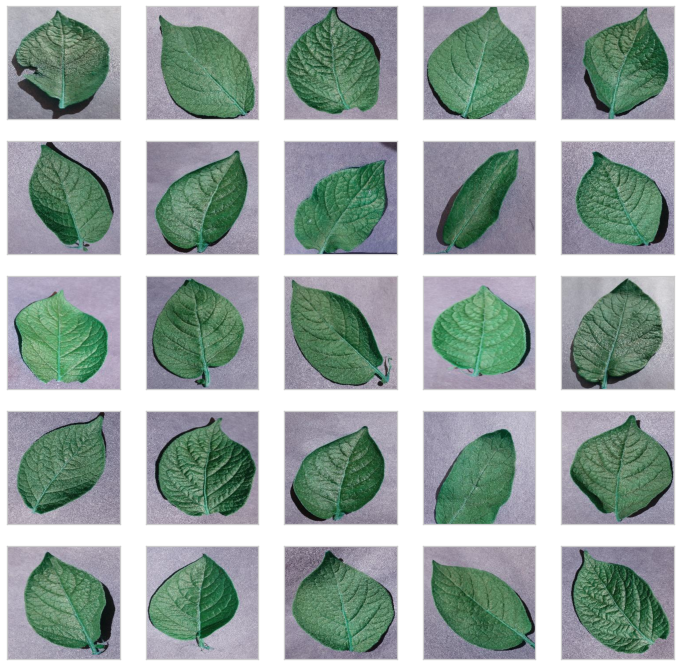

In [ ]:
plot_defects('Healthy', 5, 5)

Plotting only 1 given image

(256, 256, 3)


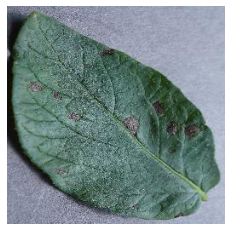

In [ ]:
# reading the image
img = imread('/content/drive/MyDrive/Datasets/original_dataset/Early_blight/00d8f10f-5038-4e0f-bb58-0b885ddc0cc5___RS_Early.B 8722.JPG')
plt.axis("off")
plt.imshow(img)
print(img.shape)

Extracting hog features from the same image

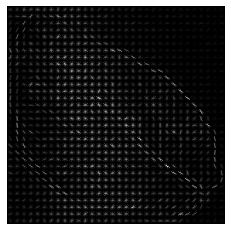

In [ ]:
#creating hog features
fd, hog_image = hog(img, orientations=9, pixels_per_cell=(8, 8),
                	cells_per_block=(2, 2), visualize=True, multichannel=True)
plt.axis("off")
plt.imshow(hog_image, cmap="gray")

(256, 256, 3)


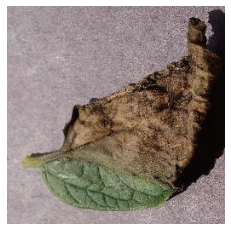

In [ ]:
#late_blight
img2 = imread('/content/drive/MyDrive/Datasets/original_dataset/Late_blight/0114b195-844c-4978-93a9-b0d5aae010f1___RS_LB 2738.JPG')
plt.axis("off")
plt.imshow(img2)
print(img2.shape)

(512, 256, 3)


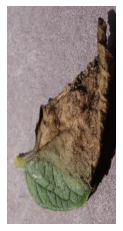

In [ ]:
# resizing image
resized_img2= resize(img2, (128*4, 64*4))
plt.axis("off")
plt.imshow(resized_img2)
print(resized_img2.shape)

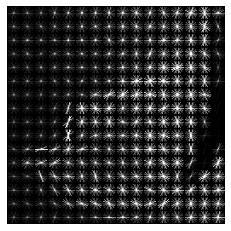

In [ ]:
#creating hog features
fd, hog_image2 = hog(img2, orientations=9, pixels_per_cell=(16, 16),
                	cells_per_block=(1, 1), visualize=True, multichannel=True)
plt.axis("off")
rescaled_hog_image2=exposure.rescale_intensity(hog_image2, in_range=(0, 10)) 
plt.imshow(rescaled_hog_image2, cmap="gray")

(256, 256, 3)


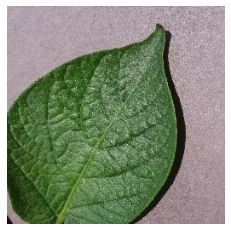

In [ ]:
#healthy
img3 = imread('/content/drive/MyDrive/Datasets/original_dataset/Healthy/0be9d721-82f5-42c3-b535-7494afe01dbe___RS_HL 1814.JPG')
plt.axis("off")
plt.imshow(img3)
print(img3.shape)


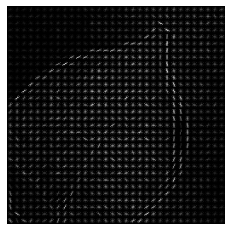

In [ ]:
#creating hog features
fd, hog_image3 = hog(img3, orientations=9, pixels_per_cell=(8, 8),
                	cells_per_block=(2, 2), visualize=True, multichannel=True)
plt.axis("off")
plt.imshow(hog_image3, cmap="gray")